# Homework 4: Practice with GroupBy

 Due 2/22/23,
 Worth 100 Pts
 Dan Hively

For this assignment we will re-use the COVID Dataset from Homework 3 

In [ ]:
# Import packages 
import pandas as pd 
import numpy as np 
import scipy.stats as spy
import matplotlib.pyplot as plt 


In [ ]:
# Bring in the data 
# https://raw.githubusercontent.com/danhively/CS4499/main/United_States_COVID-19_Community_Levels_by_County.csv
us_covid_df = pd.read_csv('https://raw.githubusercontent.com/danhively/CS4499/main/United_States_COVID-19_Community_Levels_by_County.csv')

# **Question 1**
Use .grouby on state to create a subset of this dataframe only containing entries from Washington. Then create another dataframe only containing entries from Florida. 

In [ ]:
# These DataFrames will be used to complete the other questions.

# Create DataFrame for Washington only.
washington_df = us_covid_df.groupby('state').get_group('Washington')

# Create DataFrame for Florida only.
florida_df = us_covid_df.groupby('state').get_group('Florida')

# **Question 2**
Using whichever approach you prefer, calculate the average covid hospital admissions per 100k for each state. Then calculate the standard deviations for each state. Finally, create a single histogram containing the counts from each state. Below, in 3-4 sentences, explain your observations.  	

Average Covid hospital admissions per 100k by state:
state
Alabama                                          7.755949
Alaska                                           7.658522
American Samoa                                  13.650000
Arizona                                          8.377905
Arkansas                                         7.715053
California                                       7.858571
Colorado                                         5.642366
Commonwealth of the Northern Mariana Islands     2.194737
Connecticut                                      9.712143
Delaware                                        10.655238
District of Columbia                             6.291429
Florida                                         12.335991
Georgia                                          7.314699
Guam                                            22.006250
Hawaii                                           9.332571
Idaho                                            6.055130
Illinois     

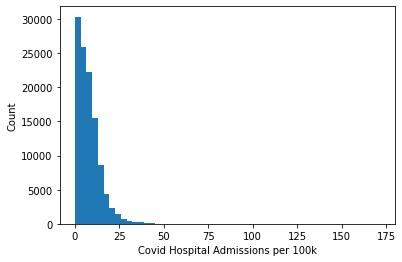

In [ ]:
# Calculate the average covid hospital admissions per 100k for each state.
avg_admissions = us_covid_df.groupby('state')['covid_hospital_admissions_per_100k'].mean()

# Calculate the standard deviation for each state.
std_devs = us_covid_df.groupby('state')['covid_hospital_admissions_per_100k'].std()

# Print the std deviation and the mean.
print("Average Covid hospital admissions per 100k by state:")
print(avg_admissions)
print("\nStandard deviation of Covid hospital admissions per 100k by state:")
print(std_devs)

# Create a single histogram containing the counts from each state.
plt.hist(us_covid_df['covid_hospital_admissions_per_100k'], bins=53)
plt.xlabel('Covid Hospital Admissions per 100k')
plt.ylabel('Count')
plt.show()


Observations


# **Question 3**
Use .groupby again to determine average number of covid cases per 100k in each county for Florida during this time period. Which had the highest? The lowest? Use a bar graph to plot the top 20 counties.  Repeat this for Washington. Do a quick internet serach on the top county for each state. Is there anything based on this information that may explain why both of these counties had the highest rate? 


Average Covid cases per 100k by county in Florida:
county
Alachua County       193.819143
Baker County         161.294286
Bay County           130.604286
Bradford County      142.143714
Brevard County       170.951143
                        ...    
Union County         126.008571
Volusia County       148.897143
Wakulla County       159.798000
Walton County        101.601714
Washington County     98.928571
Name: covid_cases_per_100k, Length: 67, dtype: float64

County with the highest average Covid cases per 100k in Florida:
Miami-Dade County

County with the lowest average Covid cases per 100k in Florida:
Glades County
--------------------------------------------------
Average Covid cases per 100k by county in Washington:
county
Adams County            99.512571
Asotin County          110.074000
Benton County          122.372000
Chelan County          134.937429
Clallam County         137.442286
Clark County           128.713429
Columbia County         82.452286
Cowlitz County        

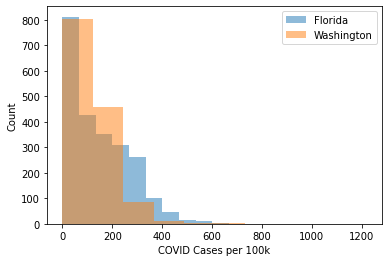

In [ ]:
############################################
## Florida
############################################
for_state = 'Florida'

# Get the average or mean.
avg_cases = florida_df.groupby('county')['covid_cases_per_100k'].mean()

# Highest
highest_county = avg_cases.idxmax()

# Lowest
lowest_county = avg_cases.idxmin()

# Print the data.
print("Average Covid cases per 100k by county in " + for_state + ':')
print(avg_cases)
print("\nCounty with the highest average Covid cases per 100k in " + for_state + ':')
print(highest_county)
print("\nCounty with the lowest average Covid cases per 100k in " + for_state + ':')
print(lowest_county)

# Make the graph.
#top_20_cases = avg_cases.nlargest(20)
#top_20_cases.plot(kind='bar')
#plt.xlabel('County')
#plt.ylabel('Average Covid Cases per 100k')
#plt.title('Top 20 Counties in ' + for_state + ' by Average Covid Cases per 100k')
#plt.show()

print('--------------------------------------------------')

############################################
## Washington
############################################
for_state = 'Washington'

# Get the average or mean.
avg_cases = washington_df.groupby('county')['covid_cases_per_100k'].mean()

# Highest
highest_county = avg_cases.idxmax()

# Lowest
lowest_county = avg_cases.idxmin()

# Print the data.
print("Average Covid cases per 100k by county in " + for_state + ':')
print(avg_cases)
print("\nCounty with the highest average Covid cases per 100k in " + for_state + ':')
print(highest_county)
print("\nCounty with the lowest average Covid cases per 100k in " + for_state + ':')
print(lowest_county)

# Make the graph.
#top_20_cases = avg_cases.nlargest(20)
#top_20_cases.plot(kind='bar')
#plt.xlabel('County')
#plt.ylabel('Average Covid Cases per 100k')
#plt.title('Top 20 Counties in Washington by Average Covid Cases per 100k')
#plt.show()

#############################
# Filter data for Florida and Washington
states_data = us_covid_df[us_covid_df['state'].isin(['Florida', 'Washington'])]

# Average Calculate Covid cases per 100k by county
avg_hospital_admissions = states_data.groupby(['state', 'county'])['covid_cases_per_100k'].mean()

# Calculate standard deviations
std_admissions = states_data.groupby('state')['covid_cases_per_100k'].std()

# Create a histogram including bot states
plt.hist(states_data[states_data['state'] == 'Florida']['covid_cases_per_100k'], alpha=0.5, label='Florida')
plt.hist(states_data[states_data['state'] == 'Washington']['covid_cases_per_100k'], alpha=0.5, label='Washington')
plt.xlabel('COVID Cases per 100k')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

# **Question 4** 

Using 1 of the 3 numerical COVID fields (covid_inpatient_bed_utilization 	covid_hospital_admissions_per_100k 	covid_cases_per_100k) for Florida. Plot a scatterplot of that feature vs.county_population. Then using Scipy, calculate the correlation coefficent for these two varaibles. Repeat for Washington dataset. In 1 to 2 paragraphs, analyze the results. Is there any correlation between the two varialbes, what kind? To what magnitude? Is this surprising or expected? 



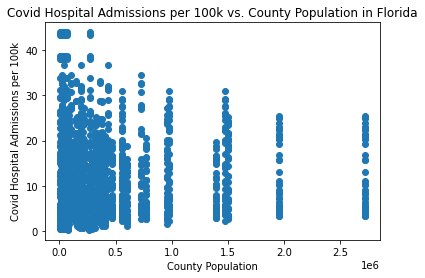

Pearsons correlation coefficient: 0.012
--------------------------------------------------


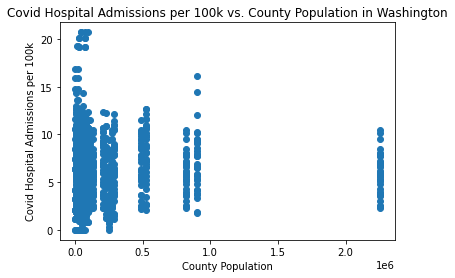

Pearsons correlation coefficient: -0.009


In [ ]:
############################################
## Florida
############################################
x = florida_df['county_population']
y = florida_df['covid_hospital_admissions_per_100k']
plt.scatter(x, y)
plt.xlabel('County Population')
plt.ylabel('Covid Hospital Admissions per 100k')
plt.title('Covid Hospital Admissions per 100k vs. County Population in Florida')
plt.show()

# Calculate the correlation coefficent
corr, _  = spy.pearsonr(x, y) 
print('Pearsons correlation coefficient: %.3f' % corr)
print('--------------------------------------------------')

############################################
## Washington
############################################
x = washington_df['county_population']
y = washington_df['covid_hospital_admissions_per_100k']
plt.scatter(x, y)
plt.xlabel('County Population')
plt.ylabel('Covid Hospital Admissions per 100k')
plt.title('Covid Hospital Admissions per 100k vs. County Population in Washington')
plt.show()

# Calculate the correlation coefficent
corr, _  = spy.pearsonr(x, y) 
print('Pearsons correlation coefficient: %.3f' % corr)

Florida has a correlation coefficient of 0.12. There is a weak positive correlation between county population and Covid hospital admissions per 100k.
Washington has a correlation coefficient of -0.09. There is a weak negative correlation between county population and Covid hospital admissions per 100k.

It may be that the relationship between county population and Covid hospital admissions per 100k is not linear. Perhaps other facors have a greater impact on the relationship between these two variables.

# Question 5
Using the Florida Dataset calculate the average covid_cases_per_100k for each of the covid-19_community_level catergories (High, Medium & Low). Plot the average value for each category using a bar plot. Repeat for Washinton and summarize your findings. 

*Hint: If we explore the dataset we will notice that the covid level was entered in both upper and lower case (High and high). Use your Python and/or Pandas knowledge to fix this.*

covid-19_community_level
High      280.663794
Low        59.300614
Medium    136.698816
Name: covid_cases_per_100k, dtype: float64


<ipython-input-29-353dc5a9cf26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_df = florida_df['covid-19_community_level'].replace({'high': 'High', 'medium': 'Medium', 'low': 'Low'}, inplace=True)


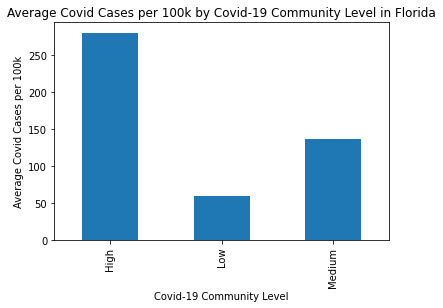

--------------------------------------------------
covid-19_community_level
High      250.427191
Low        84.987487
Medium    191.890469
Name: covid_cases_per_100k, dtype: float64


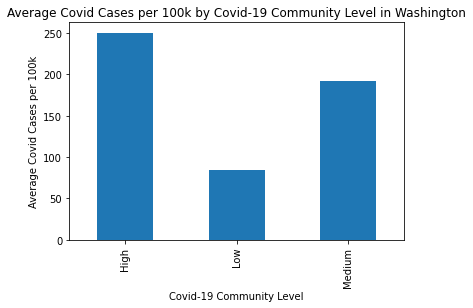

In [ ]:
############################################
## Florida
############################################

# Fix the inconsistent data in the covid-19_community_level column.
fl_df = florida_df['covid-19_community_level'].replace({'high': 'High', 'medium': 'Medium', 'low': 'Low'}, inplace=True)

# Find the mean.
avg_cases = florida_df.groupby('covid-19_community_level')['covid_cases_per_100k'].mean()
print(avg_cases)

# Create the graph.
avg_cases.plot(kind='bar')
plt.xlabel('Covid-19 Community Level')
plt.ylabel('Average Covid Cases per 100k')
plt.title('Average Covid Cases per 100k by Covid-19 Community Level in Florida')
plt.show()

print('--------------------------------------------------')

############################################
## Washington
############################################

# Find the mean
avg_cases = washington_df.groupby('covid-19_community_level')['covid_cases_per_100k'].mean()
print(avg_cases)

# Create the graph.
avg_cases.plot(kind='bar')
plt.xlabel('Covid-19 Community Level')
plt.ylabel('Average Covid Cases per 100k')
plt.title('Average Covid Cases per 100k by Covid-19 Community Level in Washington')
plt.show()

Covid-19 Community Levels per 100k are comparable between Washington and Florida.